In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

folder = 'H:\\My Drive\\PROJECTS\\PSI 2022-2025\\XRF fundamentals vs. MVA'

In [17]:
df = pd.read_csv(folder+'\\combined_results.csv')
# split for plotting
maj = df[:8].copy()
min1 = df[8:18].copy()
min2 = df[18:].copy()

#convert negative R2 to 0
# also some greater than 1 which probably comes from the 
# adj r2 calculation, which would be from negative values I believe
for d in [maj,min1,min2]:
    d['MVA_adj_r2']=d['MVA_adj_r2'].apply(lambda x: 0.01 if ((x<0)|(x>1)) else x)
    d['FP_adj_r2']=d['FP_adj_r2'].apply(lambda x: 0.01 if ((x<0)|(x>1)) else x)

### %RMSEP

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


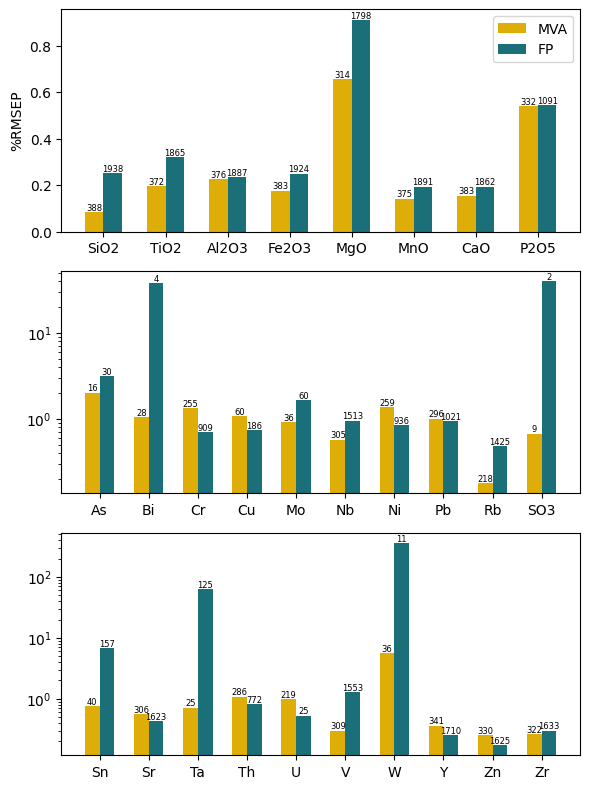

In [18]:
w=0.3

fig,ax = plt.subplots(nrows=3,
                     figsize=(6,8))
i=0
for d in [maj, min1, min2]:
    x=d.index
    x1=x-0.15
    x2=x+0.15
    m = ax[i].bar(x1, d['MVA_%rmsep_no_outliers'], width=w, color='#dead08', label='MVA')
    f = ax[i].bar(x2, d['FP_%rmsep_no_outliers'], width=w, color='#1b6f78', label='FP')
    ax[i].bar_label(m, d['MVA_n_test_no_outliers'], fontsize=6)
    ax[i].bar_label(f, d['FP_n_test_no_outliers'], fontsize=6)
    
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(d['element'])
    
    # set minors on log scale
    if i>0:
        ax[i].semilogy()
    else:
        ax[i].legend()
        ax[i].set_ylabel('%RMSEP')

    i+=1

plt.tight_layout()
plt.savefig(folder+'\\figures\\%RMSEP_comparison.eps', dpi=600)
plt.show()

### Adjusted R2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


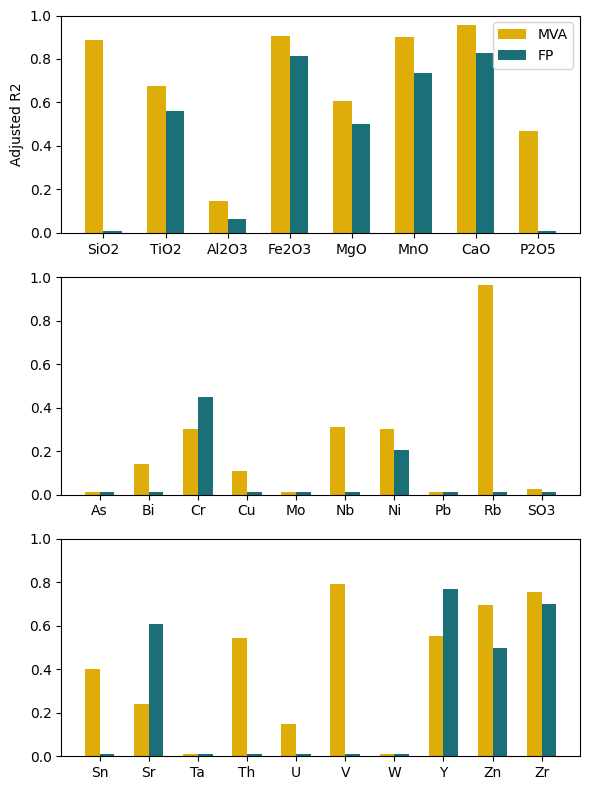

In [4]:
fig,ax = plt.subplots(nrows=3,
                     figsize=(6,8))
i=0
for d in [maj, min1, min2]:
    x=d.index
    x1=x-0.15
    x2=x+0.15
    m = ax[i].bar(x1, d['MVA_adj_r2'], width=w, color='#dead08', label='MVA')
    f = ax[i].bar(x2, d['FP_adj_r2'], width=w, color='#1b6f78', label='FP')
#    ax[i].bar_label(m, d['MVA_n_test'], fontsize=6)
#    ax[i].bar_label(f, d['FP_n_test'], fontsize=6)
    
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(d['element'])
    ax[i].set_ylim(0,1)
    
    # set minors on log scale
    if i==0:
        ax[i].legend()
        ax[i].set_ylabel('Adjusted R2')
    i+=1

plt.tight_layout()
plt.savefig(folder+'\\figures\\Adj_r2_comparison.eps', dpi=600)
plt.show()

### scatter plots

In [4]:
meta = pd.read_csv(folder+'\\data\\meta_both.csv')
fp_pt = pd.read_csv(folder+'\\instrument_pred_true.csv')
mva_pt = pd.read_csv(folder+'\\MVA_test_pred_true.csv')

In [5]:
# info for plotting
key = {
    'maj_min':{
        'elem':['SiO2','TiO2','Al2O3','Fe2O3','MgO','MnO','CaO','P2O5'],
        'units':'wt%',
        'cols':4,
        'rows':2,
        'fig':(10,5),
        'ys':[0,1,2,3]*2,
        'xs':[0,0,0,0,1,1,1,1]#,4,4]#[0,1]*4
    },
    'trace':{
        'elem':['As','Bi','Cr','Cu','Mo','Nb','Ni','Pb','Rb','SO3','Sn','Sr','Ta','Th','U','V','W','Y','Zn','Zr'],
        'units':'ppm',
        'cols':4,
        'rows':5,
        'fig':(10,12),
        'xs':[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4],
        'ys':[0,1,2,3]*5        
        #'xs':[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4],
        #'ys':[0,1,2,3]*5     
    }
}

C:\Users\ytsma22c\AppData\Local\Temp\ipykernel_24488\3660685461.py:71: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


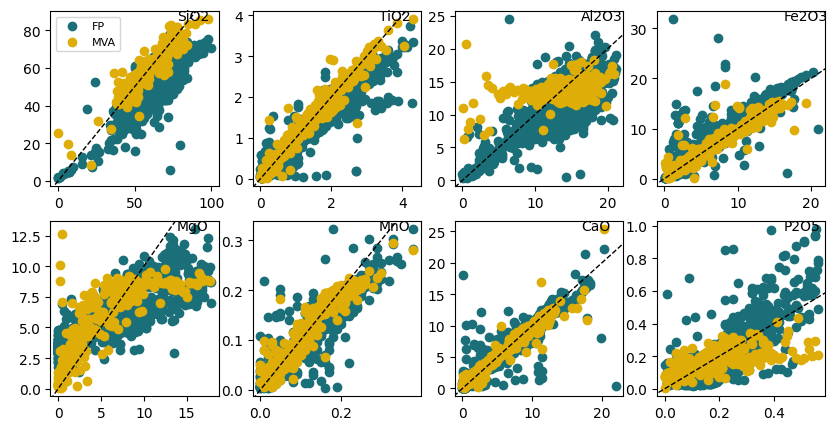

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


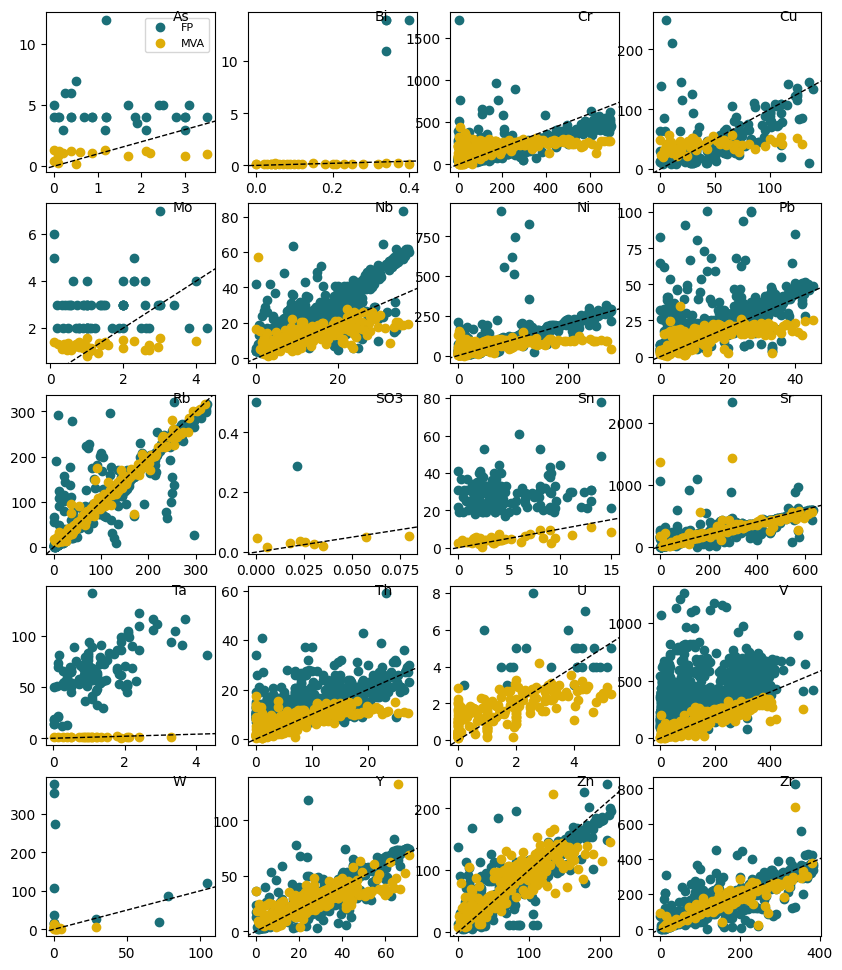

In [12]:
# key to force out outliers
outlier_info = {
    'TiO2':4.25,
    'MgO':15,
    'MnO':0.35,
    'CaO':28,
    'Cu':300,
    'Nb':90,
    'Pb':120,
    'Rb':350,
    'U':9,
    'V':1400,
    'Zn':270
}

for kind in key.keys():
    
    elem = key[kind]['elem']
    x=key[kind]['xs']
    y=key[kind]['ys']
    cols=key[kind]['cols']
    rows=key[kind]['rows']
    fig=key[kind]['fig']
    
    fig, ax = plt.subplots(ncols=cols,
                           nrows=rows,
                           figsize=fig)

    for i in np.arange(len(elem)):
        e=elem[i]
        if e == 'SO3':
            units='wt%'
        else:
            units=key[kind]['units']
        
        outliers = list(meta[meta[f'{e}_Folds']==-1]['pkey'])
        
        p = f'{e}_pred'
        t = f'{e}_actual'

        fp_temp = fp_pt[(~fp_pt[p].isna())&
                          (~fp_pt[t].isna())&
                          (~fp_pt['pkey'].isin(outliers))].copy()
        mva_temp = mva_pt[(~mva_pt[p].isna())&
                          (~mva_pt[t].isna())&
                          (~mva_pt['pkey'].isin(outliers))].copy()
        
        # remove specific outliers
        if e in outlier_info.keys():
            max_p = outlier_info[e]
            fp_temp = fp_temp[fp_temp[p]<max_p]
            mva_temp = mva_temp[mva_temp[p]<max_p]
        
        ax[x[i],y[i]].scatter(fp_temp[t], fp_temp[p], color='#1b6f78', label='FP')
        ax[x[i],y[i]].scatter(mva_temp[t], mva_temp[p], color='#dead08', label='MVA')

        # 1:1 line
        xmin, xmax = ax[x[i],y[i]].get_xlim()
        ymin, ymax = ax[x[i],y[i]].get_ylim()
        plt_min = min(ymin, xmin)
        plt_max = max(ymax, xmax)

        ax[x[i],y[i]].plot([plt_min,plt_max], [plt_min,plt_max], 'k--', linewidth=1)
        ax[x[i],y[i]].set_xlim(xmin,xmax)
        ax[x[i],y[i]].set_ylim(ymin,ymax)
            
        plt.text(0.75, 0.95, e, transform=ax[x[i],y[i]].transAxes)

    ax[x[0],y[0]].legend(fontsize=8)

    plt.tight_layout()
    plt.savefig(f'{folder}\\figures\\pred_true_{kind}.eps', dpi=600)
    plt.show()